# Import Libraries

In [1]:
!pip install optuna

In [2]:
# To store data
import pandas as pd

# To do linear algebra
import numpy as np
from numpy import pi

# To create plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt

# To create nicer plots
import seaborn as sns

# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# To get new datatypes and functions
from collections import Counter
from cycler import cycler

# To investigate distributions
from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit

# To build models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler

import optuna
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import time

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [3]:
# Load datasets

train_url = "https://raw.githubusercontent.com/hhamjaya/human_activity_recognition/main/Dataset/train.csv"
test_url = "https://raw.githubusercontent.com/hhamjaya/human_activity_recognition/main/Dataset/test.csv"

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

# Combine boths dataframes
train_df['type'] = 'Train'
test_df['type'] = 'Test'
both_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
both_df['subject'] = '#' + both_df['subject'].astype(str)

# Create label
label = both_df.pop('Activity')

print('Shape Train:\t{}'.format(train_df.shape))
print('Shape Test:\t{}\n'.format(test_df.shape))

both_df.tail()

Shape Train:	(7352, 564)
Shape Test:	(2947, 564)



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,type
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,#24,Test
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,#24,Test
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,#24,Test
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,#24,Test
10298,0.153627,-0.018437,-0.137018,-0.330046,-0.195253,-0.164339,-0.430974,-0.218295,-0.229933,-0.111527,...,-0.436940,0.598808,-0.287951,0.876030,-0.024965,-0.660080,0.263936,0.188103,#24,Test


In [4]:
train_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,type
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS,Train
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS,Train
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS,Train
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS,Train


In [5]:
n_train_samples = len(train_df)

In [6]:
both_df.shape

(10299, 563)

# Dataset Exploration

## Types of Feature

In [7]:
# Group and count main names of columns
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in both_df.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


## Null Value

In [8]:
# Get null values and dataframe information
print('Null Values In DataFrame: {}\n'.format(both_df.isna().sum().sum()))
both_df.info()

Null Values In DataFrame: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to type
dtypes: float64(561), object(2)
memory usage: 44.2+ MB


## Labels Distribution

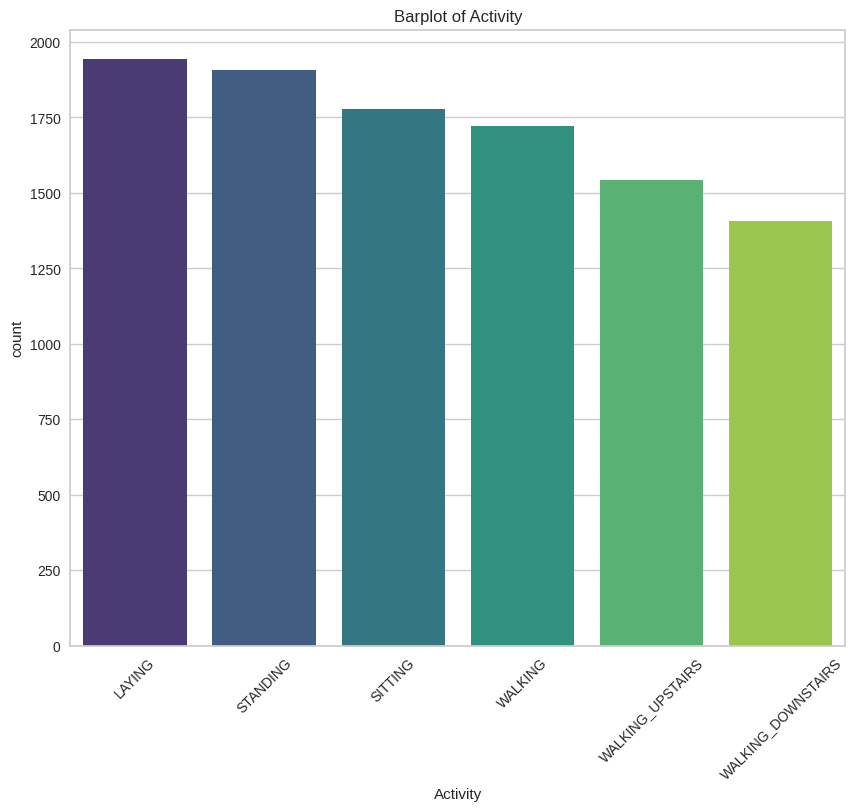

In [9]:
# Assuming `label` is a pandas Series containing categorical data
sorted_label = label.value_counts().sort_values(ascending = False)  # Sorting the values

plt.figure(figsize=(10, 8))
plt.title('Barplot of Activity')

# Define colors for each category
colors = sns.color_palette("viridis", len(sorted_label))  # Adjust the color palette as needed

# Create the count plot with sorted data
ax = sns.countplot(x=label, order=sorted_label.index, palette=colors)

# Rotate the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

In [10]:
sorted_label

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

# Merging

In [11]:
# Create label
y_train = train_df['Activity']
y_test = test_df['Activity']

X_train = train_df.drop(['Activity','type','subject'], axis=1)
X_test = test_df.drop(['Activity','type','subject'], axis=1)
X_all = both_df.drop(['type','subject'], axis=1)

In [12]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'color' column
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)
label = label_encoder.fit_transform(label)

# Dimensionality Reduction

## T-SNE

In [13]:
# Create datasets
tsne_data = both_df.copy()
data_data = tsne_data.pop('type')
subject_data = tsne_data.pop('subject')

# Transform data
tsne = TSNE(random_state=42)
tsne_transformed = tsne.fit_transform(tsne_data)

In [14]:
len(tsne_transformed)

10299

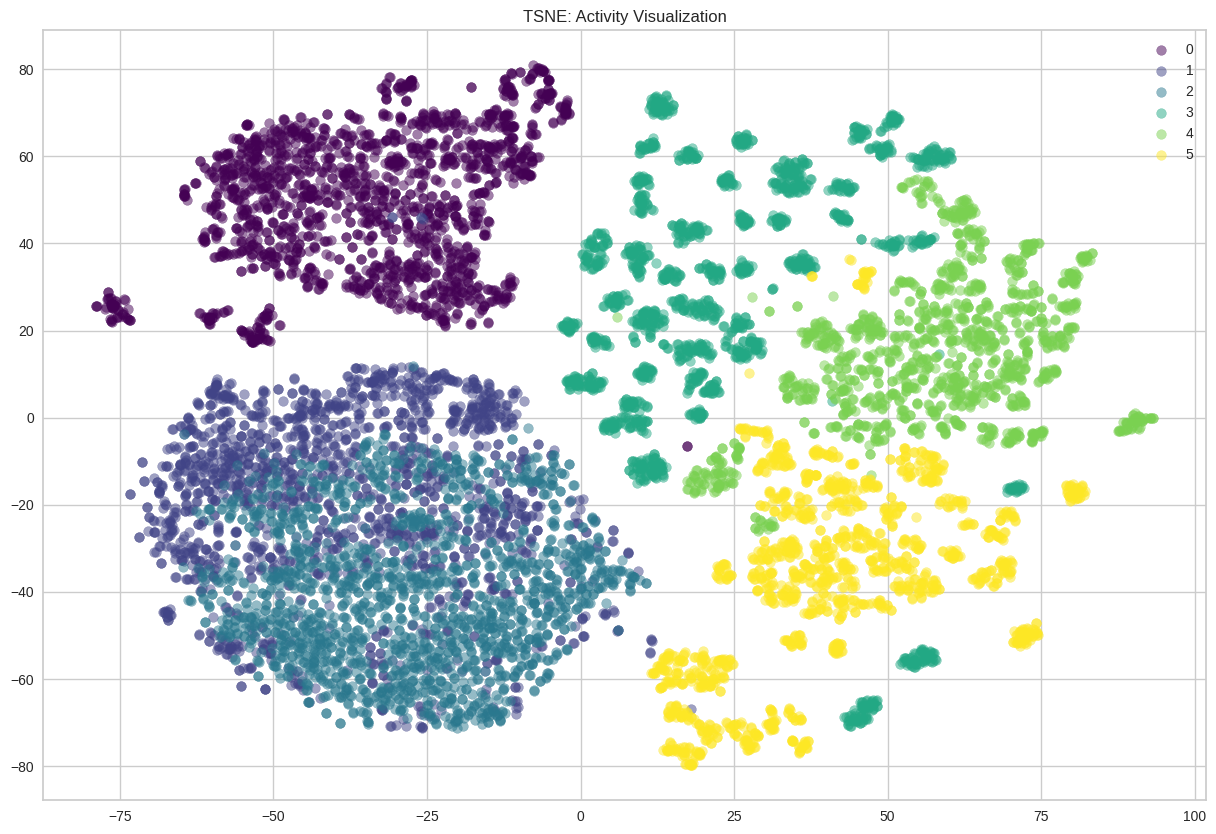

In [15]:
# Create plot
plt.figure(figsize=(15, 10))

### Plot Activities
# Get colors
unique_labels = np.unique(label)
n = len(unique_labels)
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, label_value in enumerate(unique_labels):
    # Mask to separate sets
    mask = (label == label_value)
    plt.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=label_value)


plt.title('TSNE: Activity Visualization')
plt.legend()
plt.show()

## PCA

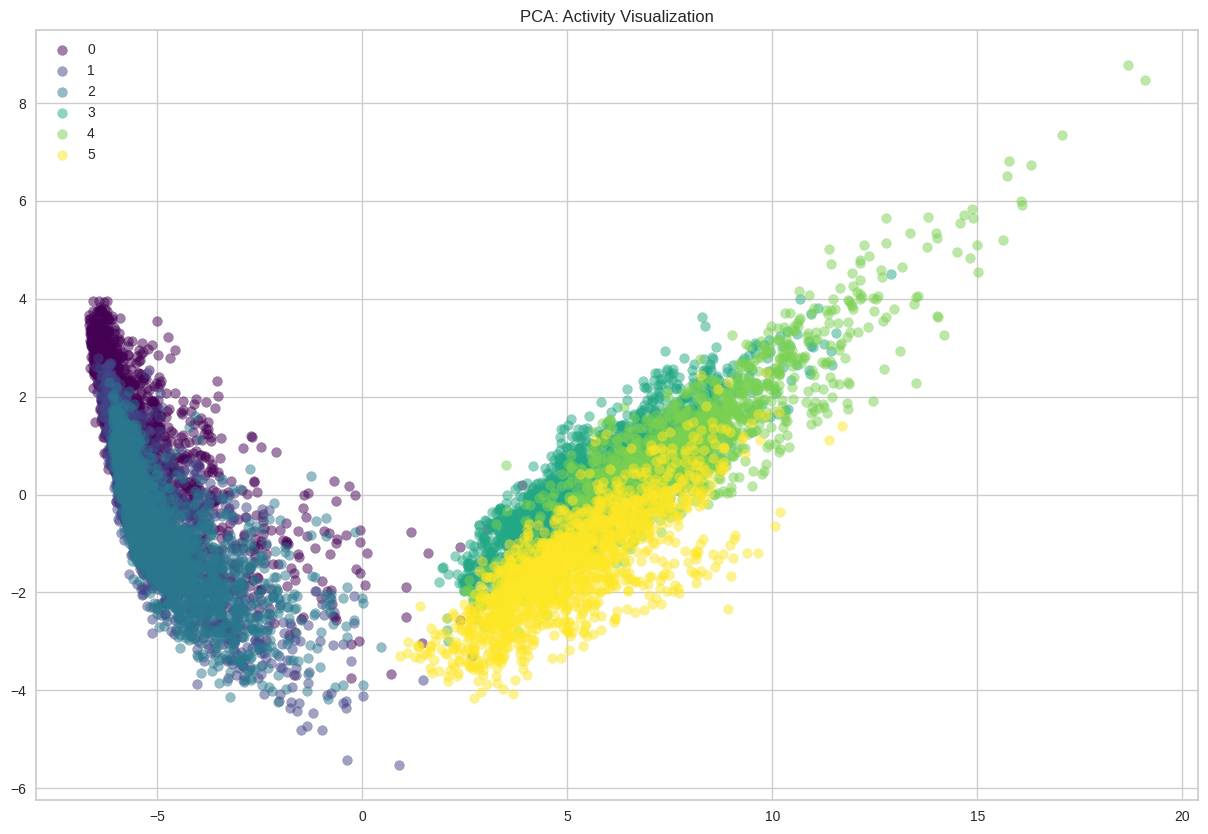

In [16]:
# Create datasets
pca_data = both_df.copy()
data_data = pca_data.pop('type')
subject_data = pca_data.pop('subject')

# PCA dimension reduction
pca = PCA(n_components=2, random_state=42)
pca_transformed = pca.fit_transform(pca_data)

# Create plot
plt.figure(figsize=(15, 10))

### Plot Activities
# Get colors
unique_labels = np.unique(label)
n = len(unique_labels)
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, label_value in enumerate(unique_labels):
    # Mask to separate sets
    mask = (label == label_value)
    plt.scatter(x=pca_transformed[mask][:,0], y=pca_transformed[mask][:,1], c=colors[i], alpha=0.5, label=label_value)

plt.title('PCA: Activity Visualization')
plt.legend()
plt.show()

The PCA dimension reduction method is dropped due to the visualization only splits in 2 clusters, while the t-SNE method could split the dataset clearly in several clusters (more than 2)

#Preprocessing

In [17]:
scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X_all)

In [18]:
scaler = StandardScaler()
X_tsne_scaled = scaler.fit_transform(tsne_data)

Dropped the modelling with these datasets since it didn't improve significantly

# Modelling

## DBSCAN

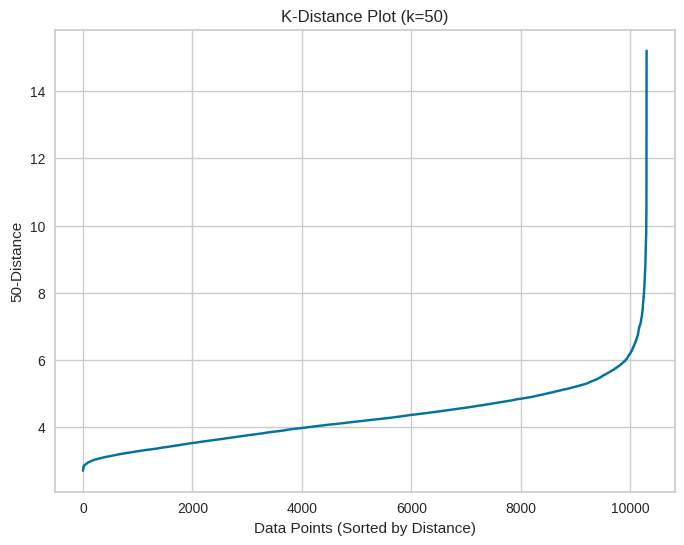

In [19]:
# Define the number of nearest neighbors (k)
k = 50

# Compute the distances to the k-th nearest neighbor
nbrs = NearestNeighbors(n_neighbors=k).fit(X_all)
distances, indices = nbrs.kneighbors(X_all)
k_distances = distances[:, -1]

# Sort the distances
sorted_distances = np.sort(k_distances)

# Plot the k-distance plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(X_all)), sorted_distances)
plt.xlabel('Data Points (Sorted by Distance)')
plt.ylabel(f'{k}-Distance')
plt.title(f'K-Distance Plot (k={k})')
plt.grid(True)
plt.show()

#### Grid Search

In [20]:
# Define the parameter range for eps and min_samples
eps_values = np.arange(5.8, 6.3, 0.1)  # Adjust the range and step as necessary
min_samples_values = range(48, 53)  # Adjust the range as necessary

# Initialize variables to store the best parameter values and their corresponding silhouette score
best_eps = None
best_min_samples = None
best_silhouette = -1

# Grid search over the parameter values
for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN with the current combination of parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X_all)

        # Evaluate the clustering
        labels = dbscan.labels_

        # We calculate the Silhouette Score only if there's more than one cluster and less than len(X)-1 noise points
        if len(set(labels)) > 1 and np.sum(labels != -1) > 1:
            silhouette = silhouette_score(X_all, labels)
            print(f'EPS: {eps}, Min Samples: {min_samples}, Silhouette: {silhouette}')

            # Update the best parameters if the current silhouette score is better
            if silhouette > best_silhouette:
                best_eps = eps
                best_min_samples = min_samples
                best_silhouette = silhouette

print(f'Best EPS: {best_eps}')
print(f'Best Min Samples: {best_min_samples}')
print(f'Best Silhouette Score: {best_silhouette}')

EPS: 5.8, Min Samples: 48, Silhouette: 0.3265573002523137
EPS: 5.8, Min Samples: 49, Silhouette: 0.3265573002523137
EPS: 5.8, Min Samples: 50, Silhouette: 0.32623735374025403
EPS: 5.8, Min Samples: 51, Silhouette: 0.32560439279257775
EPS: 5.8, Min Samples: 52, Silhouette: 0.32560439279257775
EPS: 5.8999999999999995, Min Samples: 48, Silhouette: 0.33676075134949557
EPS: 5.8999999999999995, Min Samples: 49, Silhouette: 0.33676075134949557
EPS: 5.8999999999999995, Min Samples: 50, Silhouette: 0.33676075134949557
EPS: 5.8999999999999995, Min Samples: 51, Silhouette: 0.33676075134949557
EPS: 5.8999999999999995, Min Samples: 52, Silhouette: 0.33676075134949557
EPS: 5.999999999999999, Min Samples: 48, Silhouette: 0.34346157356600115
EPS: 5.999999999999999, Min Samples: 49, Silhouette: 0.34346157356600115
EPS: 5.999999999999999, Min Samples: 50, Silhouette: 0.34307306453957986
EPS: 5.999999999999999, Min Samples: 51, Silhouette: 0.34300157248710544
EPS: 5.999999999999999, Min Samples: 52, Silh

By using the exact same parameter with Optuna, the silhouette score can reach 0.4 at some trials that I conduct, but it might cause error when there is no cluster founds, that's why I didn't attach it here, otherwise I will get penalty for non-runnable code.

but overall the cluster that could be found is 1 cluster at max

but since sometimes it is working and sometimes it isn't I would just comment it, try it with your own responsibility, because I didn't want to get reduction point because of this

#### Optuna

In [21]:
# def objective(trial):
#     # Define search space for hyperparameters
#     epsilon = trial.suggest_float('epsilon', 5.8, 6.3)
#     min_samples = trial.suggest_int('min_samples', 40, 60)

#     # Fit DBSCAN with current hyperparameters
#     dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
#     clusters = dbscan.fit(X_all)

#     # Compute silhouette score for evaluation
#     silhouette_avg = silhouette_score(X_all, clusters.labels_)

#     # Optimize for silhouette score (maximize)
#     return silhouette_avg

# # Define Optuna study and start optimization
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Get the best hyperparameters
# best_epsilon = study.best_params['epsilon']
# best_min_samples = study.best_params['min_samples']

# # Fit DBSCAN with the best hyperparameters
# best_dbscan = DBSCAN(eps=best_epsilon, min_samples=best_min_samples)
# best_clusters = best_dbscan.fit_predict(X_all)

# # Print best hyperparameters and silhouette score
# print("Best Epsilon:", best_epsilon)
# print("Best Min Samples:", best_min_samples)
# print("Best Silhouette Score:", study.best_value)


optuna_best_epsilon = 6.299429485573467

optuna_best_min_samples= 40

optuna_best_silhouette_score = 0.374513283243013

In [22]:
# Fit DBSCAN with current hyperparameters
start_time = time.time()
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(X_all)
print("--- %s seconds ---" % (time.time() - start_time))

# Analyze the clustering results
labels = clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print('Estimated number of clusters: {}'.format(n_clusters))
print('Estimated number of noise points: {}'.format(n_noise))

--- 5.551645040512085 seconds ---
Estimated number of clusters: 1
Estimated number of noise points: 62


## DBSCAN with T-SNE

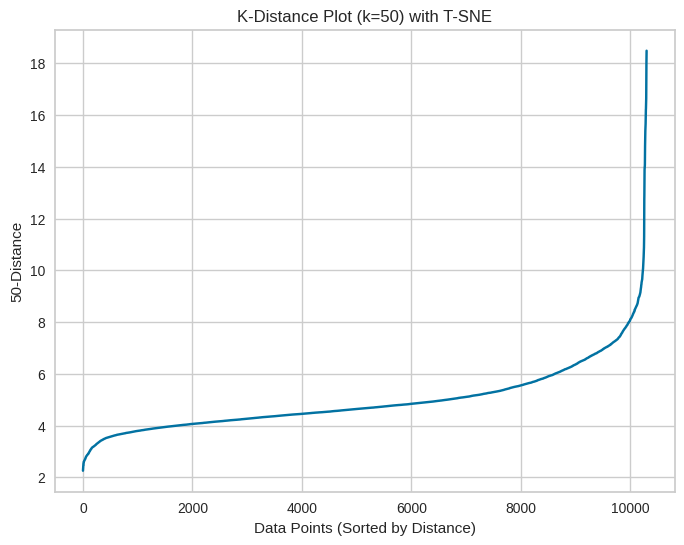

In [23]:
# Define the number of nearest neighbors (k)
k = 50

# Compute the distances to the k-th nearest neighbor
nbrs = NearestNeighbors(n_neighbors=k).fit(tsne_transformed)
distances, indices = nbrs.kneighbors(tsne_transformed)
k_distances = distances[:, -1]

# Sort the distances
sorted_distances = np.sort(k_distances)

# Plot the k-distance plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(tsne_transformed)), sorted_distances)
plt.xlabel('Data Points (Sorted by Distance)')
plt.ylabel(f'{k}-Distance')
plt.title(f'K-Distance Plot (k={k}) with T-SNE')
plt.grid(True)
plt.show()

In [24]:
# Define the parameter range for eps and min_samples
eps_values = np.arange(7.8, 8.3, 0.1)  # Adjust the range and step as necessary
min_samples_values = range(48, 53)  # Adjust the range as necessary

# Initialize variables to store the best parameter values and their corresponding silhouette score
best_eps = None
best_min_samples = None
best_silhouette = -1

# Grid search over the parameter values
for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN with the current combination of parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(tsne_transformed)

        # Evaluate the clustering
        labels = dbscan.labels_

        # We calculate the Silhouette Score only if there's more than one cluster and less than len(X)-1 noise points
        if len(set(labels)) > 1 and np.sum(labels != -1) > 1:
            silhouette = silhouette_score(X_all, labels)
            print(f'EPS: {eps}, Min Samples: {min_samples}, Silhouette: {silhouette}')

            # Update the best parameters if the current silhouette score is better
            if silhouette > best_silhouette:
                best_eps = eps
                best_min_samples = min_samples
                best_silhouette = silhouette

print(f'Best EPS: {best_eps}')
print(f'Best Min Samples: {best_min_samples}')
print(f'Best Silhouette Score: {best_silhouette}')

EPS: 7.8, Min Samples: 48, Silhouette: 0.08576241395521877
EPS: 7.8, Min Samples: 49, Silhouette: 0.08530134705724216
EPS: 7.8, Min Samples: 50, Silhouette: 0.08530134705724216
EPS: 7.8, Min Samples: 51, Silhouette: 0.08483788579745924
EPS: 7.8, Min Samples: 52, Silhouette: 0.08881974193672482
EPS: 7.8999999999999995, Min Samples: 48, Silhouette: -0.18182074554651878
EPS: 7.8999999999999995, Min Samples: 49, Silhouette: -0.18182074554651878
EPS: 7.8999999999999995, Min Samples: 50, Silhouette: -0.18182074554651878
EPS: 7.8999999999999995, Min Samples: 51, Silhouette: -0.1817981617969916
EPS: 7.8999999999999995, Min Samples: 52, Silhouette: -0.13176812168338886
EPS: 7.999999999999999, Min Samples: 48, Silhouette: -0.18184094796047237
EPS: 7.999999999999999, Min Samples: 49, Silhouette: -0.18184094796047237
EPS: 7.999999999999999, Min Samples: 50, Silhouette: -0.18184094796047237
EPS: 7.999999999999999, Min Samples: 51, Silhouette: -0.18184094796047237
EPS: 7.999999999999999, Min Samples

By using the exact same parameter with Optuna, the silhouette score can reach 0.3, but it might cause error when there is no cluster founds, that's why I didn't attach it here, otherwise I will get penalty for non-runnable code.

but overall the cluster that could be found is 1 cluster at max

but since sometimes it is working and sometimes it isn't I would just comment it, try it with your own responsibility, because I didn't want to get reduction point because of this

In [25]:
# def objective(trial):
#     # Define search space for hyperparameters
#     epsilon = trial.suggest_float('epsilon', 7.8, 8.3)
#     min_samples = trial.suggest_int('min_samples', 40, 60)

#     # Fit DBSCAN with current hyperparameters
#     dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
#     clusters = dbscan.fit(tsne_transformed)

#     # Compute silhouette score for evaluation
#     silhouette_avg = silhouette_score(tsne_transformed, clusters.labels_)

#     # Optimize for silhouette score (maximize)
#     return silhouette_avg

# # Define Optuna study and start optimization
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Get the best hyperparameters
# best_epsilon = study.best_params['epsilon']
# best_min_samples = study.best_params['min_samples']

# # Fit DBSCAN with the best hyperparameters
# best_dbscan = DBSCAN(eps=best_epsilon, min_samples=best_min_samples)
# best_clusters = best_dbscan.fit_predict(tsne_transformed)

# # Print best hyperparameters and silhouette score
# print("Best Epsilon:", best_epsilon)
# print("Best Min Samples:", best_min_samples)
# print("Best Silhouette Score:", study.best_value)


In [26]:
optuna_best_epsilon = 7.837666573343394
optuna_best_min_samples= 52
optuna_best_silhouette_score = 0.3160167932510376

In [27]:
grid_search_best_epsilon = 7.8
grid_search_best_min_samples= 52
grid_search_best_silhouette_score = 0.08881974193672482

#### Grid Search

In [28]:
# Fit DBSCAN with current hyperparameters
start_time = time.time()
dbscan = DBSCAN(eps=grid_search_best_epsilon, min_samples=grid_search_best_min_samples)
clusters = dbscan.fit_predict(tsne_transformed)
print("--- %s seconds ---" % (time.time() - start_time))

# Analyze the clustering results
labels = clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print('Estimated number of clusters: {}'.format(n_clusters))
print('Estimated number of noise points: {}'.format(n_noise))

--- 0.12137484550476074 seconds ---
Estimated number of clusters: 6
Estimated number of noise points: 142


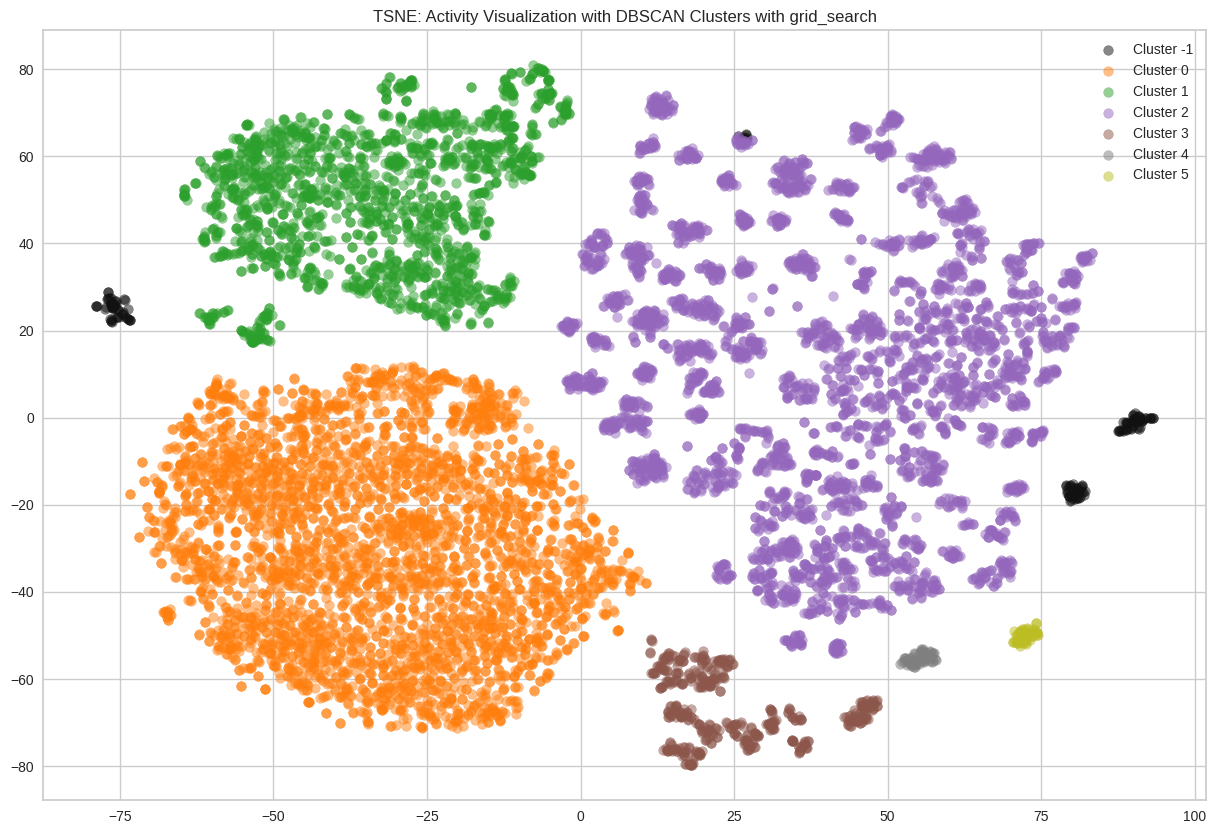

In [29]:
# Fit DBSCAN with current hyperparameters
dbscan = DBSCAN(eps=grid_search_best_epsilon, min_samples=grid_search_best_min_samples)
clusters = dbscan.fit_predict(tsne_transformed)

# Analyze the clustering results
core_samples_mask = np.zeros_like(clusters, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Create plot
plt.figure(figsize=(15, 10))

### Plot DBSCAN clusters
# Get colors for DBSCAN clusters
unique_clusters = np.unique(clusters)
n_clusters = len(unique_clusters)
colormap = get_cmap('tab10')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n_clusters))]

# Plot DBSCAN clusters
for i, cluster_label in enumerate(unique_clusters):
    if cluster_label == -1:
        # Black color for noise points
        color = 'k'
    else:
        color = colors[i]
    # Mask to separate clusters
    mask = (clusters == cluster_label)
    plt.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=color, alpha=0.5, label=f'Cluster {cluster_label}')

plt.title('TSNE: Activity Visualization with DBSCAN Clusters with grid_search')
plt.legend()
plt.show()


#### Optuna

In [30]:
# Fit DBSCAN with current hyperparameters
start_time = time.time()
dbscan = DBSCAN(eps=optuna_best_epsilon, min_samples=optuna_best_min_samples)
clusters = dbscan.fit_predict(tsne_transformed)
print("--- %s seconds ---" % (time.time() - start_time))

# Analyze the clustering results
labels = clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print('Estimated number of clusters: {}'.format(n_clusters))
print('Estimated number of noise points: {}'.format(n_noise))

--- 0.18310976028442383 seconds ---
Estimated number of clusters: 6
Estimated number of noise points: 141


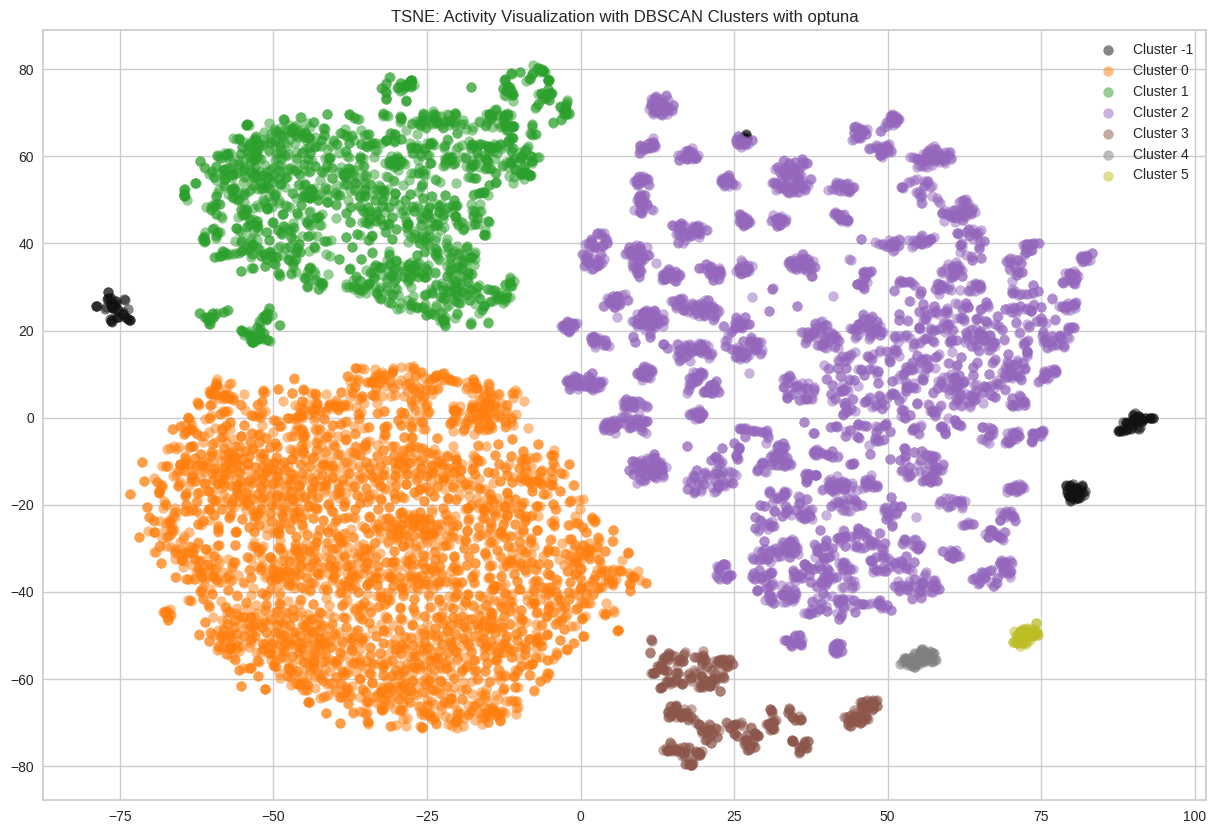

In [31]:
# Fit DBSCAN with current hyperparameters
dbscan = DBSCAN(eps=optuna_best_epsilon, min_samples=optuna_best_min_samples)
clusters = dbscan.fit_predict(tsne_transformed)

# Analyze the clustering results
core_samples_mask = np.zeros_like(clusters, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Create plot
plt.figure(figsize=(15, 10))

### Plot DBSCAN clusters
# Get colors for DBSCAN clusters
unique_clusters = np.unique(clusters)
n_clusters = len(unique_clusters)
colormap = get_cmap('tab10')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n_clusters))]

# Plot DBSCAN clusters
for i, cluster_label in enumerate(unique_clusters):
    if cluster_label == -1:
        # Black color for noise points
        color = 'k'
    else:
        color = colors[i]
    # Mask to separate clusters
    mask = (clusters == cluster_label)
    plt.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=color, alpha=0.5, label=f'Cluster {cluster_label}')

plt.title('TSNE: Activity Visualization with DBSCAN Clusters with optuna')
plt.legend()
plt.show()


## K-MEANS

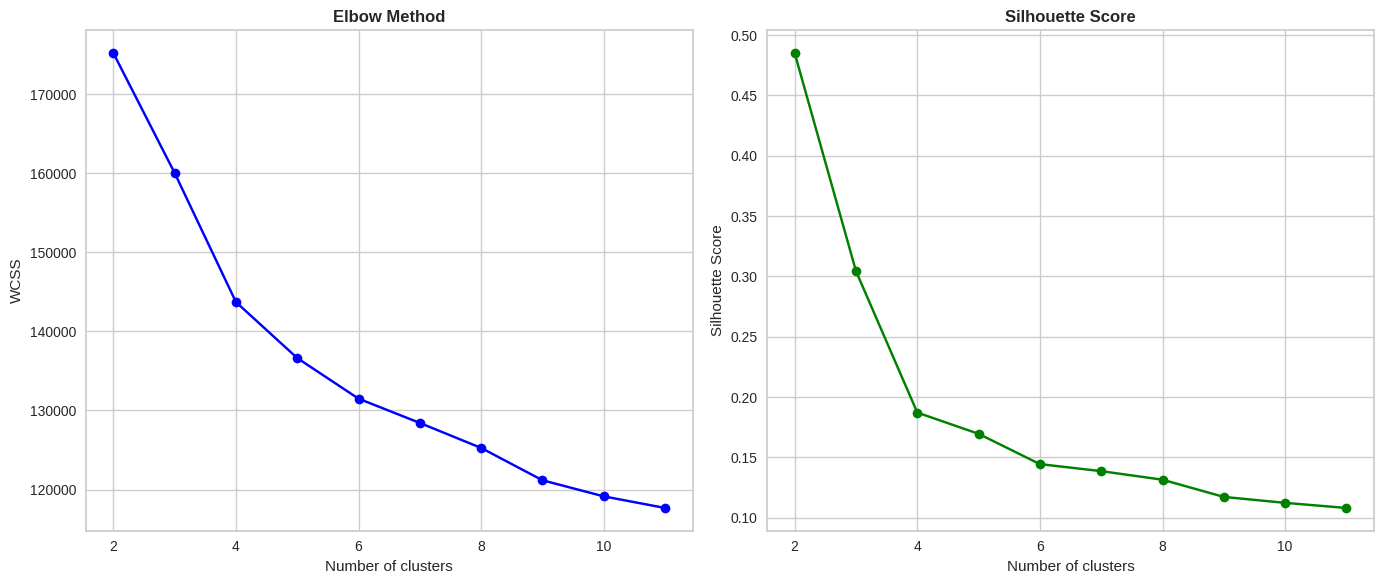

[0.4851541220680405,
 0.30444569249098963,
 0.18722388778315638,
 0.1696176825724076,
 0.14451650061647678,
 0.13867640357248065,
 0.13159225102068806,
 0.11733156486336778,
 0.11241106806043837,
 0.1081594686161702]

In [32]:
# Number of clusters to evaluate
cluster_range = range(2, 12)

# Initialize lists to store the WCSS and Silhouette Scores for each number of clusters
wcss = []
silhouette_scores = []

for k in cluster_range:
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=k, init='k-means++',n_init='auto',random_state=42)
    kmeans.fit(X_train)

    # Append the WCSS for this k to the list
    wcss.append(kmeans.inertia_)

    # Calculate and append the Silhouette Score
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

# Plotting the Elbow Method graph
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method', fontweight="bold")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='green')
plt.title('Silhouette Score', fontweight="bold")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Returning the Silhouette Scores for examination
silhouette_scores


In [33]:
start_time = time.time()
kmeans = KMeans(n_clusters=2, init='k-means++',n_init='auto',random_state=42)
kmeans.fit(X_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.1993107795715332 seconds ---


The best number of cluster for K-Means without t-SNE is 2 clusters with highest silhouette score

## K-Means with T-SNE

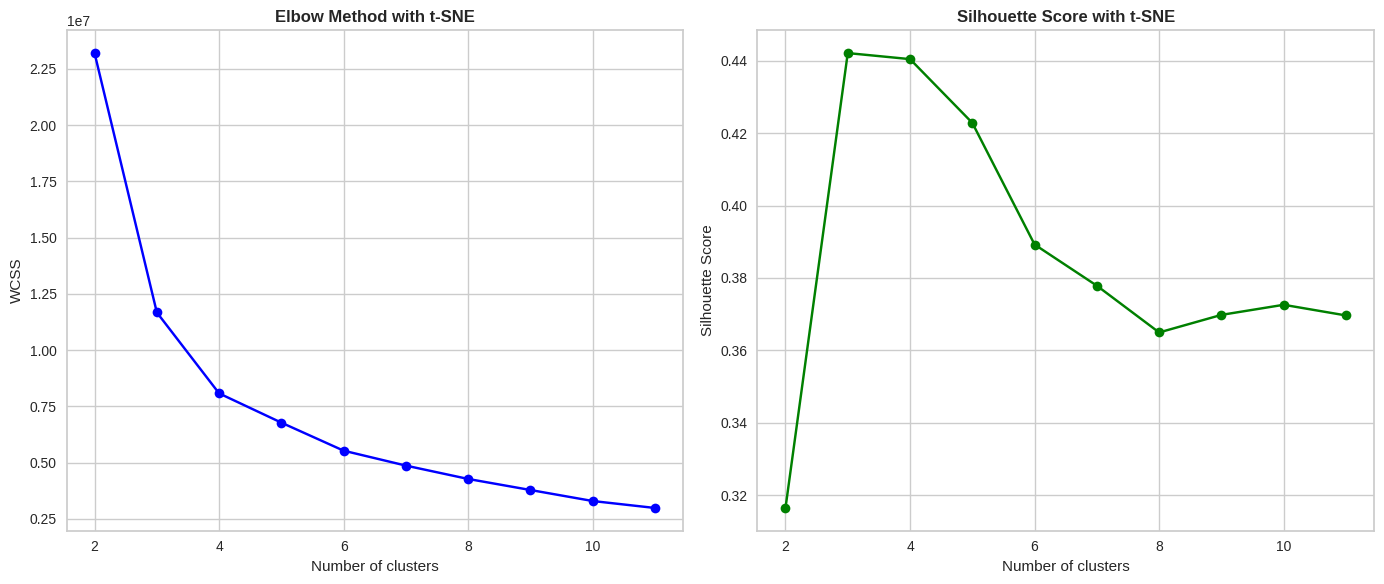

[0.31643504,
 0.44212314,
 0.44045177,
 0.42283672,
 0.38922432,
 0.3778436,
 0.36493063,
 0.36978748,
 0.37257636,
 0.36963183]

In [34]:
# Number of clusters to evaluate
cluster_range = range(2, 12)

# Initialize lists to store the WCSS and Silhouette Scores for each number of clusters
wcss = []
silhouette_scores = []

for k in cluster_range:
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=k, init='k-means++',n_init='auto',random_state=42)
    kmeans.fit(tsne_transformed)

    # Append the WCSS for this k to the list
    wcss.append(kmeans.inertia_)

    # Calculate and append the Silhouette Score
    silhouette_scores.append(silhouette_score(tsne_transformed, kmeans.labels_))

# Plotting the Elbow Method graph
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method with t-SNE', fontweight="bold")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='green')
plt.title('Silhouette Score with t-SNE', fontweight="bold")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Returning the Silhouette Scores for examination
silhouette_scores

### K-Means with 3 clusters

In [35]:
k = 3
start_time = time.time()
kmeans = KMeans(n_clusters=k, init='k-means++',n_init='auto', random_state=42).fit(tsne_transformed)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.019939661026000977 seconds ---


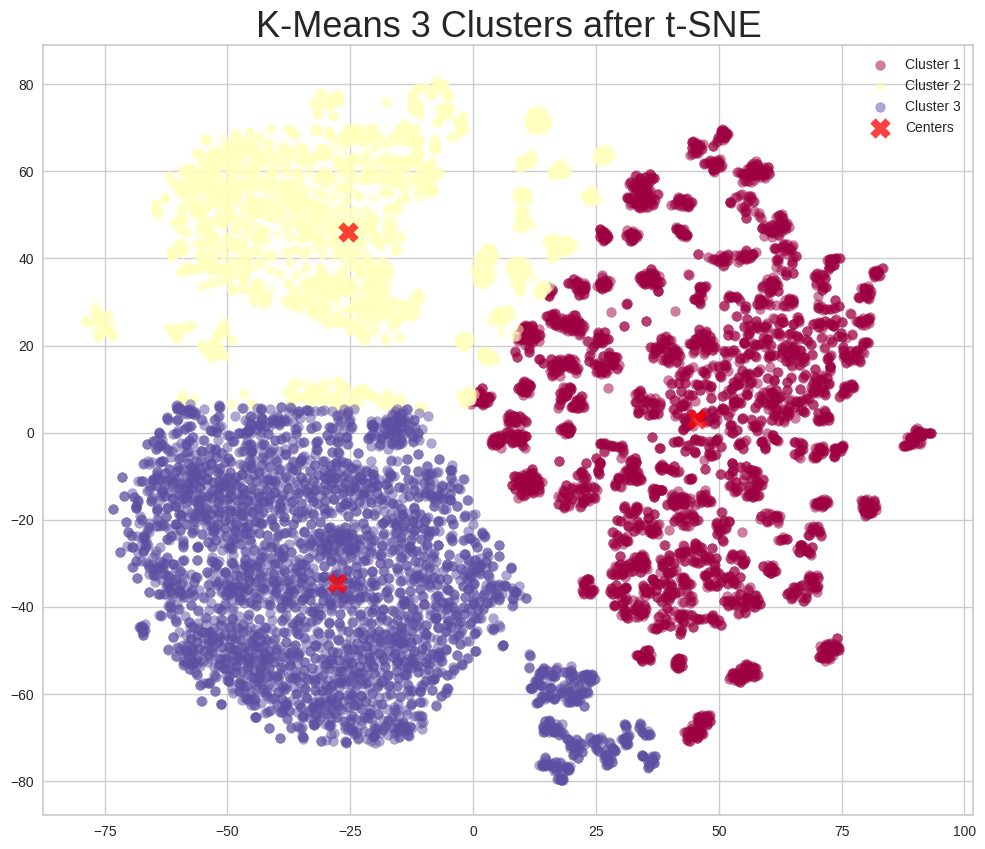

In [36]:
cluster_labels = kmeans.labels_
unique_labels = set(cluster_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Plotting the results
fig, ax = plt.subplots(figsize=(12, 10))

# Plot each cluster
for i in range(k):
    # Mask to separate sets
    mask = cluster_labels == i
    ax.scatter(tsne_transformed[mask][:,0], tsne_transformed[mask][:,1], alpha=0.5, label=f'Cluster {i + 1}', c = colors[i])

# Marking the cluster centers
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centers')

ax.set_title('K-Means 3 Clusters after t-SNE', fontsize = 26)
ax.legend()

plt.show()

### K-Means with 4 clusters

In [37]:
k = 4
start_time = time.time()
kmeans = KMeans(n_clusters=k, init='k-means++',n_init='auto', random_state=42).fit(tsne_transformed)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.017981529235839844 seconds ---


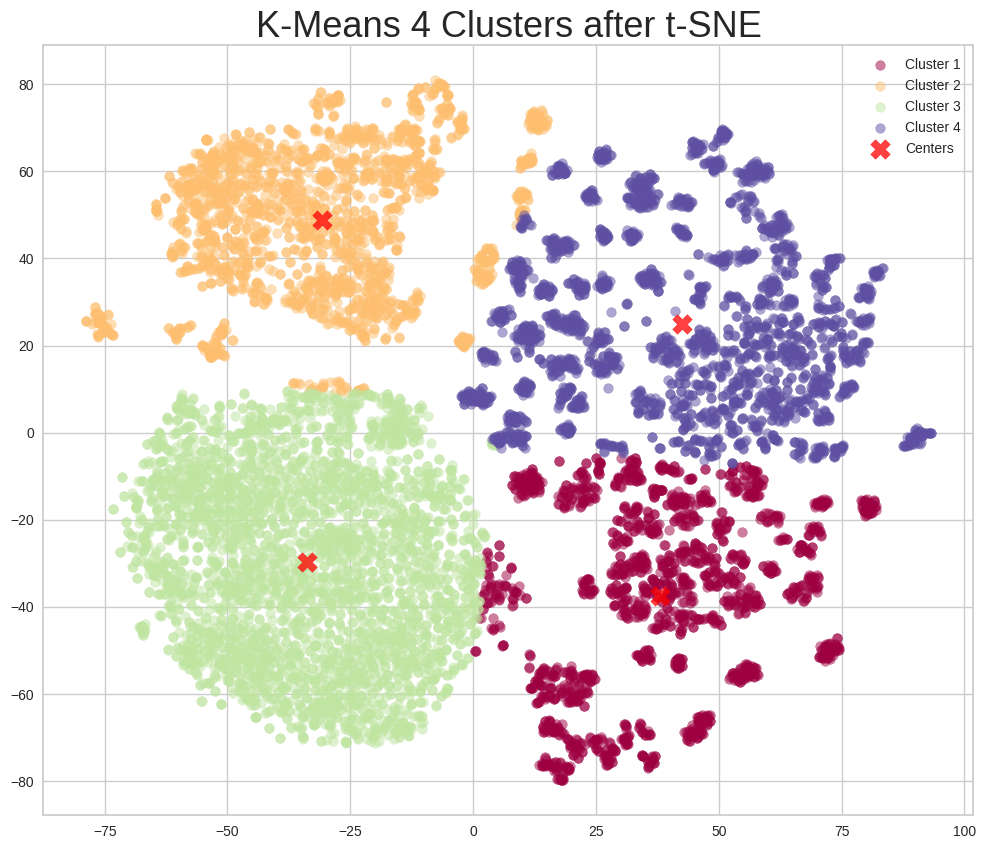

In [38]:
cluster_labels = kmeans.labels_
unique_labels = set(cluster_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Plotting the results
fig, ax = plt.subplots(figsize=(12, 10))

# Plot each cluster
for i in range(k):
    # Mask to separate sets
    mask = cluster_labels == i
    ax.scatter(tsne_transformed[mask][:,0], tsne_transformed[mask][:,1], alpha=0.5, label=f'Cluster {i + 1}', c = colors[i])

# Marking the cluster centers
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centers')

ax.set_title('K-Means 4 Clusters after t-SNE', fontsize = 26)
ax.legend()

plt.show()